Remove missing files from labels list

In [4]:
labels = open("labels.txt", "r") # Open the labels file
missingInfo = open("MissingImages.txt",'r')
newLabels = open("labels_none_missing.txt",'w')
import mmap
s = mmap.mmap(missingInfo.fileno(), 0, access=mmap.ACCESS_READ)

In [5]:
lineCount = 0
for line in labels:
    words = line.split()
    lineCount += 1
    if s.find(words[0]) == -1:
        if words[0].find('.jpg') != -1:
            newLabels.write(line)

Create a matrix of class amounts.

In [8]:
img_labels = ['lake', 'plants', 'window', 'buildings',
                             'grass', 'animal', 'water', 'person',
                             'clouds', 'sky', 'NA']
values = dict()
for index, lab in enumerate(img_labels):
    values[lab] = index
import numpy as np

In [61]:
A = np.zeros((lineCount, len(img_labels)), dtype = 'bool')
for i, line in enumerate(labels):
    words = line.split()
    #present = map(lambda x : x in words, img_labels)
    #print present
    A[i] = map(lambda x : x in words[1:], img_labels)
    

With this array we can now get the number of times each pair occurs together in isolation

In [67]:
# Select only places with only two labels
twoLabelsIdx = np.sum(A,1) == 2
ATwoLabels = A[twoLabelsIdx,:]

In [71]:
crossIncidence = np.zeros([len(img_labels),len(img_labels)])
import itertools as it
for i in it.permutations(range(0,len(img_labels)), 2):
    temp = np.logical_and(ATwoLabels[:,i[0]],ATwoLabels[:,i[1]])
    #temp = [for x in ATwoLabels[:,i[0]] and ATwoLabels[:,i[1]]
    crossIncidence[i] = sum(temp)

In [20]:
lines = labels.readlines()
print lines[12000]
words = lines[12000].split()
print map(lambda x : x in words[1:], img_labels)

12603.jpg sky clouds water

[False, False, False, False, False, False, True, False, True, True, False]


In [100]:
temp = np.sum(A,0) 

In [101]:
temp[1]

13803

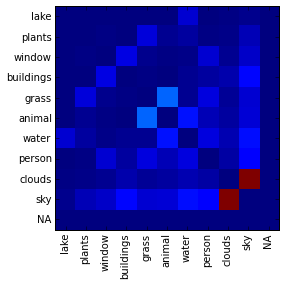

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(crossIncidence/crossIncidence.argmax(),interpolation='nearest')
plt.xticks(range(11),img_labels, rotation=90)
plt.yticks(range(11),img_labels)
plt.show()

From this it looks like sky and clouds, unsurprisingly occur together often. The numbers are:

In [102]:
oneLabelIdx = np.sum(A,1) == 1
oneLabelIdx = A[oneLabelIdx,:]
oneLabelTotals = np.sum(oneLabelIdx,0)
#temp = np.sum(A,0) 
print "n clouds and sky = {:.0f}".format(crossIncidence[8,9])
print "n clouds alone = {:.0f}".format(oneLabelTotals[8])
print "n sky alone = {:.0f}".format(oneLabelTotals[9])

n clouds and sky = 16186
n clouds alone = 3446
n sky alone = 10154


This therefore looks like a much better dataset for trialing, and demonstrating the benefits of the multitask method of learning. The second largest value is 3636, which is animal and grass.

In [135]:
temp = crossIncidence.reshape(1,121)
temp2 = temp.argsort()
temp[0,temp2[0][::-1][:3]]

array([ 16186.,  16186.,   3636.])

In [134]:
temp2[0][::-1][:3]

array([ 97, 107,  59])

This tools is used to make a single batch version of a set of labels, for trialling on a small number of images to test the net. 